/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Test Accuracy: 89.09%
Epoch 1, Loss: 0.6330
Test Accuracy: 91.94%
Epoch 2, Loss: 0.2165
Test Accuracy: 90.80%
Epoch 3, Loss: 0.1764
Test Accuracy: 92.26%
Epoch 4, Loss: 0.1549
Test Accuracy: 91.06%
Epoch 5, Loss: 0.1437
Test Accuracy: 92.23%
Epoch 6, Loss: 0.1361
Test Accuracy: 88.48%
Epoch 7, Loss: 0.1256
Test Accuracy: 92.90%
Epoch 8, Loss: 0.1207
Test Accuracy: 92.02%
Epoch 9, Loss: 0.1152
Test Accuracy: 92.80%
Epoch 10, Loss: 0.1083
Test Accuracy: 92.28%
Epoch 11, Loss: 0.1044
Test Accuracy: 93.03%
Epoch 12, Loss: 0.1030
Test Accuracy: 92.14%
Epoch 13, Loss: 0.0943
Test Accuracy: 93.15%
Epoch 14, Loss: 0.0957
Test Accuracy: 92.60%
Epoch 15, Loss: 0.0914
Test Accuracy: 93.24%
Epoch 16, Loss: 0.0855
Test Accuracy: 92.23%
Epoch 17, Loss: 0.0828
Test Accuracy: 94.20%
Epoch 18, Loss: 0.0794
Test Accuracy: 93.60%
Epoch 19, Loss: 0.0754
Test Accuracy: 92.69%
Epoch 20, Loss: 0.0759
Test Accuracy: 93.32%
Epoch 21, Loss: 0.0698
Test Accuracy: 93.18%
Epoch 22, Loss: 0.0669
Test Accuracy: 92.4

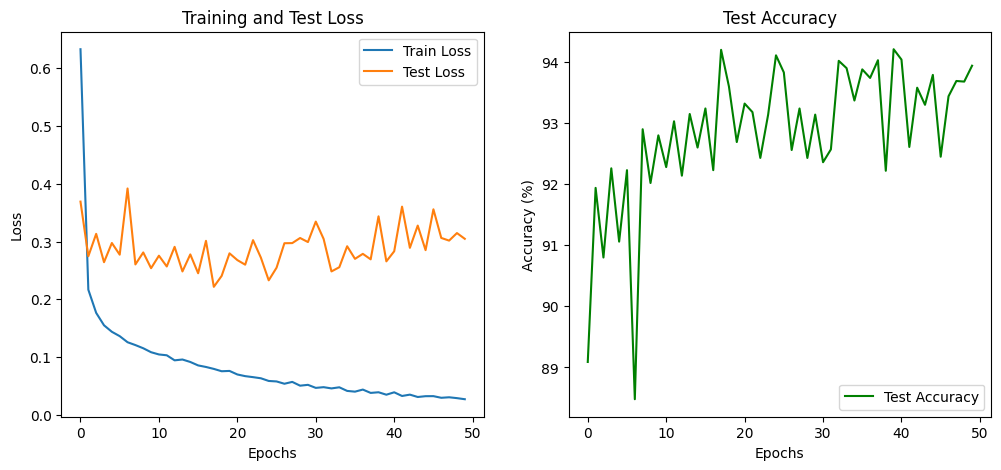

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the Transformer-based classifier
class TransformerClassifier(nn.Module):
    def __init__(self, input_dim=28, embed_dim=64, num_heads=4, num_layers=2, num_classes=10):
        super(TransformerClassifier, self).__init__()
        
        self.embedding = nn.Linear(input_dim, embed_dim)
        encoder_layers = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        self.fc = nn.Linear(embed_dim, num_classes)
        
    def forward(self, x):
        x = x.squeeze(1).to(device)  # Shape: (batch_size, 28, 28)
        x = self.embedding(x).to(device)  # Shape: (batch_size, 28, embed_dim)
        x = self.transformer_encoder(x).to(device)  # Shape: (batch_size, 28, embed_dim)
        x = x.mean(dim=1).to(device)  # Global average pooling
        x = self.fc(x).to(device)  # Shape: (batch_size, num_classes)
        return x

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TransformerClassifier().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
train_losses, test_losses, test_accuracies = [], [], []
def train_model(model, train_loader, criterion, optimizer, epochs=50):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_losses.append(total_loss / len(train_loader))
        test_loss, test_acc = evaluate_model(model, test_loader)
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    correct, total = 0, 0
    total_loss = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_acc = 100 * correct / total
    print(f"Test Accuracy: {test_acc:.2f}%")
    return total_loss / len(test_loader), test_acc

# Train and evaluate the model
train_model(model, train_loader, criterion, optimizer, epochs=50)

torch.save(model.state_dict(), "mnist_transformer.pth")
print("Model saved as mnist_transformer.pth")

# Plot training loss and test accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_accuracies, label="Test Accuracy", color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy")
plt.legend()

plt.show()


Training model with hidden layers: [128, 64]
Epoch 1, Loss: 0.4041
Epoch 2, Loss: 0.1945
Epoch 3, Loss: 0.1449
Accuracy: 96.12%
Training model with hidden layers: [256, 128]
Epoch 1, Loss: 0.3356
Epoch 2, Loss: 0.1481
Epoch 3, Loss: 0.1107
Accuracy: 96.23%
Training model with hidden layers: [512, 256, 128]
Epoch 1, Loss: 0.3218
Epoch 2, Loss: 0.1449
Epoch 3, Loss: 0.1107
Accuracy: 96.27%
Training model with hidden layers: [1024, 512, 256]
Epoch 1, Loss: 0.2998
Epoch 2, Loss: 0.1416
Epoch 3, Loss: 0.1097
Accuracy: 96.83%
Best model found with hidden layers [1024, 512, 256] achieving 96.83% accuracy


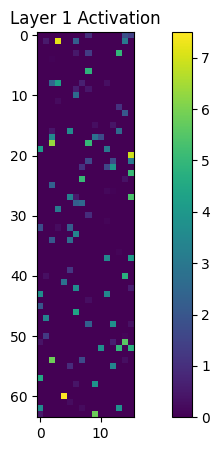

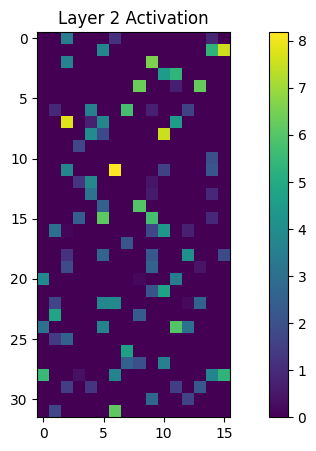

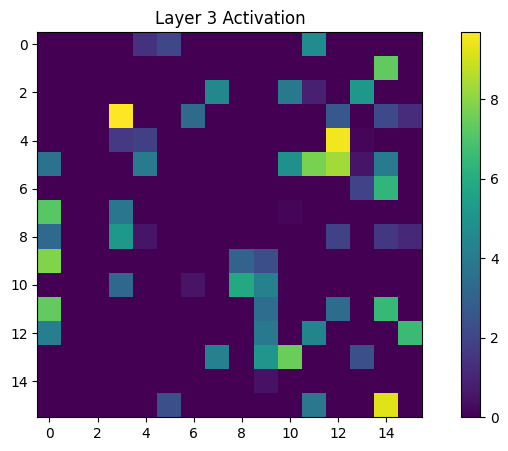

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os

# Load Dataset (MNIST)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define MLP Model
class MLP(nn.Module):
    def __init__(self, input_size=28*28, hidden_sizes=[512, 256], output_size=10):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        layers = []
        prev_size = input_size
        for h in hidden_sizes:
            layers.append(nn.Linear(prev_size, h))
            layers.append(nn.ReLU())
            prev_size = h
        layers.append(nn.Linear(prev_size, output_size))
        self.layers = nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.flatten(x)
        return self.layers(x)

# Training Function
def train(model, trainloader, criterion, optimizer, epochs=3):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

# Evaluation Function
def evaluate(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy

# Feature Visualization
def visualize_features(model, images):
    model.eval()
    with torch.no_grad():
        images = images[:1]  # Select first image
        activations = []
        x = model.flatten(images)
        for layer in model.layers:
            x = layer(x)
            if isinstance(layer, nn.ReLU):
                activations.append(x)
    
    for i, activation in enumerate(activations):
        plt.figure(figsize=(10, 5))
        plt.title(f'Layer {i+1} Activation')
        plt.imshow(activation[0].cpu().numpy().reshape(-1, 16), cmap='viridis')
        plt.colorbar()
        plt.show()

# Different configurations
configs = [
    [128, 64],
    [256, 128],
    [512, 256, 128],
    [1024, 512, 256],
]

best_model = None
best_accuracy = 0
best_config = None

os.makedirs("models", exist_ok=True)

for config in configs:
    print(f"Training model with hidden layers: {config}")
    model = MLP(hidden_sizes=config)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train(model, trainloader, criterion, optimizer)
    acc = evaluate(model, testloader)
    
    # Save model
    model_path = f"models/mlp_{'_'.join(map(str, config))}.pth"
    torch.save(model.state_dict(), model_path)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_config = config

print(f"Best model found with hidden layers {best_config} achieving {best_accuracy:.2f}% accuracy")

# Load best model
sample_images, _ = next(iter(testloader))
visualize_features(best_model, sample_images)

## thngs that can be dome to increase accuracy - data augmentation

Training model with hidden layers: [128, 64]
Epoch 1, Loss: 0.8447
Accuracy: 91.84%
Training model with hidden layers: [256, 128]
Epoch 1, Loss: 0.7517
Accuracy: 93.07%
Training model with hidden layers: [512, 256, 128]
Epoch 1, Loss: 0.6315
Accuracy: 93.83%
Training model with hidden layers: [1024, 512, 256]
Epoch 1, Loss: 0.5700
Accuracy: 93.40%
Best model found with hidden layers [512, 256, 128] achieving 93.83% accuracy


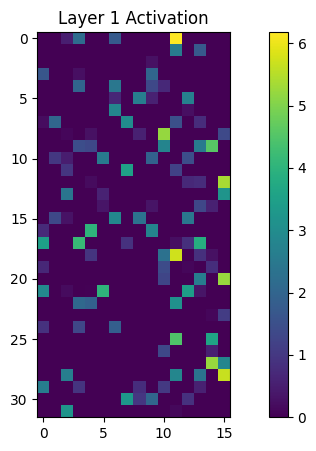

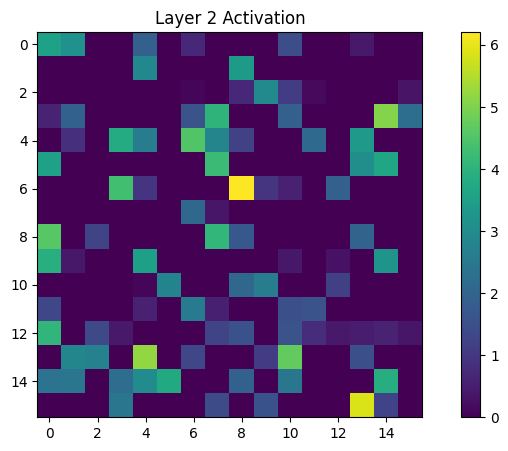

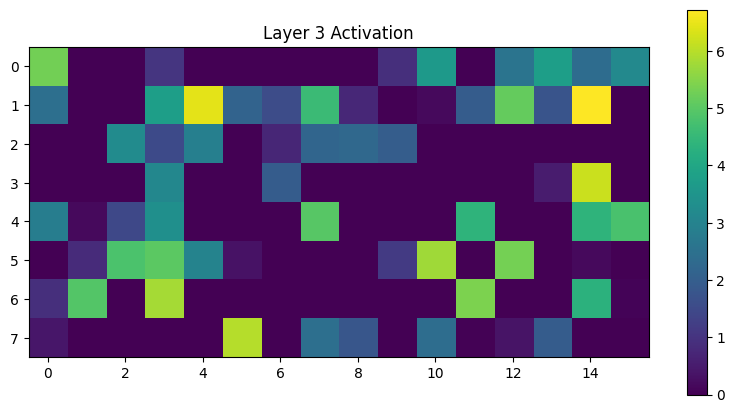

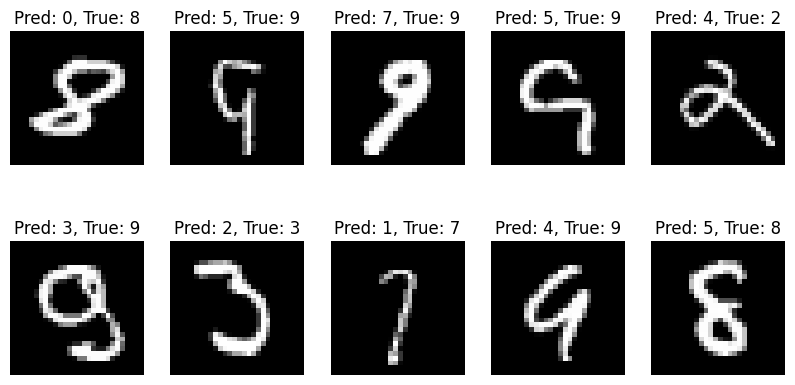

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os

# Load Dataset (MNIST) with Data Augmentation
transform_train = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_test)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define MLP Model
class MLP(nn.Module):
    def __init__(self, input_size=28*28, hidden_sizes=[512, 256], output_size=10):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        layers = []
        prev_size = input_size
        for h in hidden_sizes:
            layers.append(nn.Linear(prev_size, h))
            layers.append(nn.ReLU())
            prev_size = h
        layers.append(nn.Linear(prev_size, output_size))
        self.layers = nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.flatten(x)
        return self.layers(x)

# Training Function
def train(model, trainloader, criterion, optimizer, epochs=1):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

# Evaluation Function
def evaluate(model, testloader):
    model.eval()
    correct = 0
    total = 0
    misclassified = []
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # Store misclassified examples
            misclassified.extend([(img, pred, lbl) for img, pred, lbl in zip(images, predicted, labels) if pred != lbl])
    
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy, misclassified

# Feature Visualization
def visualize_features(model, images):
    model.eval()
    with torch.no_grad():
        images = images[:1]  # Select first image
        activations = []
        x = model.flatten(images)
        for layer in model.layers:
            x = layer(x)
            if isinstance(layer, nn.ReLU):
                activations.append(x)
    
    for i, activation in enumerate(activations):
        plt.figure(figsize=(10, 5))
        plt.title(f'Layer {i+1} Activation')
        plt.imshow(activation[0].cpu().numpy().reshape(-1, 16), cmap='viridis')
        plt.colorbar()
        plt.show()

# Visualizing Misclassified Examples
def visualize_misclassified(misclassified, num_images=10):
    plt.figure(figsize=(10, 5))
    for i, (img, pred, lbl) in enumerate(misclassified[:num_images]):
        plt.subplot(2, 5, i+1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f'Pred: {pred.item()}, True: {lbl.item()}')
        plt.axis('off')
    plt.show()

# Different configurations
configs = [
    [128, 64],
    [256, 128],
    [512, 256, 128],
    [1024, 512, 256],
]

best_model = None
best_accuracy = 0
best_config = None
best_misclassified = []

os.makedirs("models", exist_ok=True)

for config in configs:
    print(f"Training model with hidden layers: {config}")
    model = MLP(hidden_sizes=config)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train(model, trainloader, criterion, optimizer)
    acc, misclassified = evaluate(model, testloader)
    
    # Save model
    model_path = f"models/mlp_{'_'.join(map(str, config))}.pth"
    torch.save(model.state_dict(), model_path)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_config = config
        best_misclassified = misclassified

print(f"Best model found with hidden layers {best_config} achieving {best_accuracy:.2f}% accuracy")

# Load best model
sample_images, _ = next(iter(testloader))
visualize_features(best_model, sample_images)
visualize_misclassified(best_misclassified)
